In [1]:
#To exclude warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing libraries 
import pandas as pd                                           #for woeking on dataframe
import numpy as np                                            #for general use
import random                                                 #for randomly choosing 
from scipy import integrate                                   #for integrating 
import seaborn as sns                                         #for making plot,chart 
import matplotlib.pyplot as plt                               #for making plot,chart
from sklearn.model_selection import train_test_split          #for splitting data 
from sklearn.metrics import mean_squared_error                #for calculating RMSE
from sklearn.feature_selection import SelectKBest, f_regression  #for selecting best features
from sklearn.metrics import r2_score                          #Calculating R2 score
from datetime import timedelta
import datetime  
from datetime import date

In [3]:
from sklearn.ensemble import RandomForestRegressor            #Random Forest Regressor
import xgboost as xgb                                         #XGB

In [4]:
df = pd.read_csv('train.csv')

In [5]:
df_test = pd.read_csv('test.csv')

In [6]:
print('train : ',len(df))
print('test : ',len(df_test))

train :  8533
test :  2134


In [7]:
train, test_i = train_test_split(df, test_size=0.30, random_state=42, shuffle=False)
val, test = train_test_split(test_i, test_size=0.5, random_state=42, shuffle=False)

In [8]:
print('train : ',len(train))
print('val : ',len(val))
print('test : ',len(test))

train :  5973
val :  1280
test :  1280


In [9]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,09-04-2019,Banglore,Delhi,04:00,06:50,2h 50m,non-stop,No info,3943.0
1,IndiGo,03-06-2019,Banglore,Delhi,08:30,11:20,2h 50m,non-stop,No info,4823.0
2,Jet Airways,09-06-2019,Mumbai,Hyderabad,19:35,21:05,1h 30m,non-stop,In-flight meal not included,3210.0
3,Multiple carriers,27-05-2019,Delhi,Cochin,12:50,21:00,8h 10m,1 stop,No info,7005.0
4,Air India,06-06-2019,Delhi,Cochin,06:50,07-06-2021 07:40,24h 50m,2 stops,No info,13381.0


In [10]:
train.describe()

,Price
count,5973.000000
mean,9034.823037
std,4384.609129
min,1759.000000
25%,5228.000000
50%,8371.000000
75%,12373.000000
max,31945.000000


In [11]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# EDA

<AxesSubplot:xlabel='Airline', ylabel='count'>

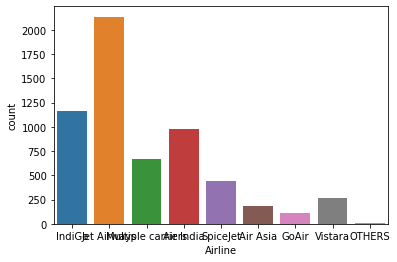

In [12]:
sns.countplot(x='Airline',data=train)

In [13]:
train['Airline'].value_counts()

Jet Airways          2136
IndiGo               1163
Air India             980
Multiple carriers     673
SpiceJet              446
Vistara               270
Air Asia              184
GoAir                 114
OTHERS                  7
Name: Airline, dtype: int64

In [14]:
train['Date_of_Journey'].value_counts()

09-05-2019    292
12-06-2019    288
18-05-2019    280
21-05-2019    279
06-06-2019    274
09-06-2019    268
15-05-2019    252
21-03-2019    225
27-05-2019    218
06-03-2019    217
27-06-2019    197
01-06-2019    197
03-06-2019    196
24-06-2019    190
03-03-2019    181
15-06-2019    180
24-03-2019    176
27-03-2019    172
09-03-2019    167
01-05-2019    155
24-05-2019    154
01-04-2019    149
06-05-2019    148
12-05-2019    125
01-03-2019    107
18-03-2019     89
15-03-2019     87
09-04-2019     80
12-03-2019     77
03-04-2019     60
06-04-2019     57
21-06-2019     57
27-04-2019     54
15-04-2019     52
03-05-2019     51
24-04-2019     51
18-06-2019     49
21-04-2019     47
12-04-2019     38
18-04-2019     37
Name: Date_of_Journey, dtype: int64

In [15]:
train['Source'].value_counts()

Delhi       2563
Kolkata     1585
Banglore    1216
Mumbai       388
Chennai      221
Name: Source, dtype: int64

In [16]:
train['Destination'].value_counts()

Cochin       2563
Banglore     1585
Delhi         720
New Delhi     496
Hyderabad     388
Kolkata       221
Name: Destination, dtype: int64

In [17]:
train['Dep_Time'].value_counts()

18:55    133
17:00    129
07:05    120
09:00    118
10:00    117
        ... 
11:20      1
16:15      1
01:35      1
03:00      1
21:35      1
Name: Dep_Time, Length: 217, dtype: int64

In [18]:
train['Dep_Time']=pd.to_datetime(train['Dep_Time'],format='%H:%M').dt.time
val['Dep_Time']=pd.to_datetime(val['Dep_Time'],format='%H:%M').dt.time
test['Dep_Time']=pd.to_datetime(test['Dep_Time'],format='%H:%M').dt.time

In [19]:
def check(s):
    mins = int(s.minute)
    hour = int(s.hour)
    s = mins/60 + hour
    return s

In [20]:
train['Dep_Time']=train['Dep_Time'].apply(check)
val['Dep_Time']=val['Dep_Time'].apply(check)
test['Dep_Time']=test['Dep_Time'].apply(check)

In [21]:
train['Arrival_Time'].value_counts()

19:00               242
21:00               206
19:15               187
16:10                93
12:35                71
                   ... 
10-06-2021 05:25      1
07-05-2021 19:10      1
25-05-2021 18:00      1
25-05-2021 19:10      1
10-05-2021 18:30      1
Name: Arrival_Time, Length: 1037, dtype: int64

In [22]:
train['Arrival_Time'] = pd.to_datetime(train['Arrival_Time']).dt.time
val['Arrival_Time'] = pd.to_datetime(val['Arrival_Time']).dt.time
test['Arrival_Time'] = pd.to_datetime(test['Arrival_Time']).dt.time

In [23]:
train['Arrival_Time']=train['Arrival_Time'].apply(check)
val['Arrival_Time']=val['Arrival_Time'].apply(check)
test['Arrival_Time']=test['Arrival_Time'].apply(check)

In [24]:
train['Duration']

0        2h 50m
1        2h 50m
2        1h 30m
3        8h 10m
4       24h 50m
         ...   
5968    10h 10m
5969     1h 30m
5970     2h 45m
5971    30h 40m
5972    13h 30m
Name: Duration, Length: 5973, dtype: object

In [25]:
train['Duration']=  train['Duration'].str.replace("h", '*1').str.replace(' ','+').str.replace('m','/60').apply(eval)
val['Duration']=  val['Duration'].str.replace("h", '*1').str.replace(' ','+').str.replace('m','/60').apply(eval)
test['Duration']=  test['Duration'].str.replace("h", '*1').str.replace(' ','+').str.replace('m','/60').apply(eval)

In [26]:
train['Duration']

0        2.833333
1        2.833333
2        1.500000
3        8.166667
4       24.833333
          ...    
5968    10.166667
5969     1.500000
5970     2.750000
5971    30.666667
5972    13.500000
Name: Duration, Length: 5973, dtype: float64

<AxesSubplot:xlabel='Additional_Info', ylabel='count'>

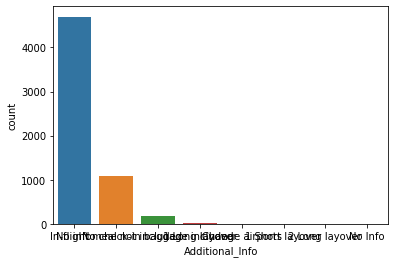

In [27]:
sns.countplot(x='Additional_Info',data=train)

In [28]:
train['Additional_Info'].value_counts()

No info                         4694
In-flight meal not included     1088
No check-in baggage included     175
1 Long layover                    11
Change airports                    2
No Info                            1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [29]:
test['Additional_Info'].value_counts()

No info                         1003
In-flight meal not included      248
No check-in baggage included      25
1 Long layover                     3
Change airports                    1
Name: Additional_Info, dtype: int64

In [30]:
val['Additional_Info'].value_counts()

No info                         987
In-flight meal not included     239
No check-in baggage included     49
Change airports                   2
No Info                           1
1 Long layover                    1
Red-eye flight                    1
Name: Additional_Info, dtype: int64

In [31]:
train['Additional_Info'] = np.where(train['Additional_Info']=='No Info','No info',train['Additional_Info'])
val['Additional_Info'] = np.where(val['Additional_Info']=='No Info','No info',val['Additional_Info'])

In [32]:
train["Additional_Info"].replace({'Change airports':'Other', 
                               'Business class':'Other',
                               '1 Short layover':'Other',
                               '1 Long layover':'Other',
                               'Red-eye flight':'Other',
                               '2 Long layover':'Other',   
                              },inplace=True)

In [33]:
test["Additional_Info"].replace({'Change airports':'Other', 
                               '1 Long layover':'Other',  
                              },inplace=True)

In [34]:
val["Additional_Info"].replace({'Change airports':'Other', 
                               '1 Long layover':'Other',
                                'Red-eye flight':'Other',
                              },inplace=True)

In [35]:
train['Date_of_Journey']=pd.to_datetime(train['Date_of_Journey'])

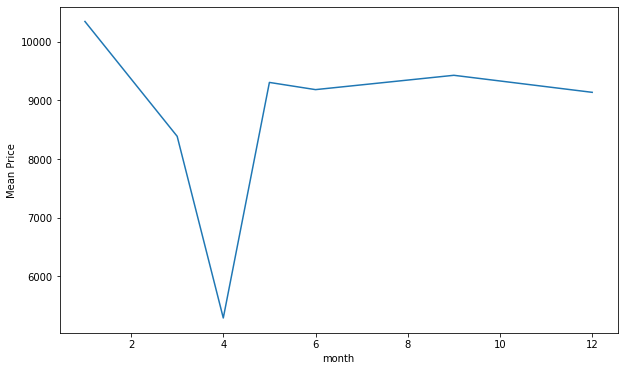

In [36]:
plt.figure(figsize=(10,6))
train.groupby(train['Date_of_Journey'].dt.month)['Price'].mean().plot()
plt.xlabel("month")
plt.ylabel("Mean Price")
plt.show()

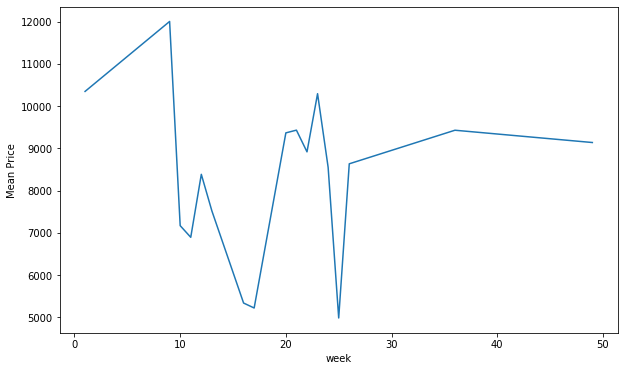

In [37]:
plt.figure(figsize=(10,6))
train.groupby(train['Date_of_Journey'].dt.week)['Price'].mean().plot()
plt.xlabel("week")
plt.ylabel("Mean Price")
plt.show()

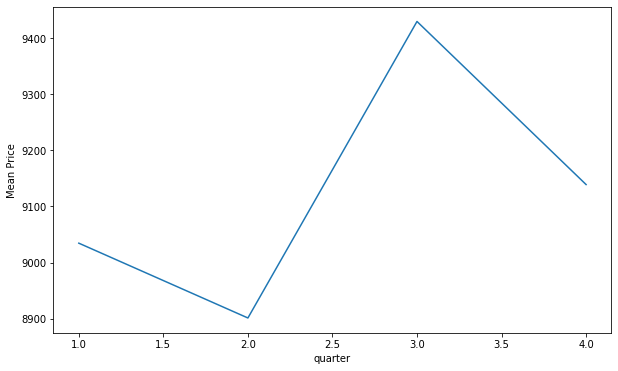

In [38]:
plt.figure(figsize=(10,6))
train.groupby(train['Date_of_Journey'].dt.quarter)['Price'].mean().plot()
plt.xlabel("quarter")
plt.ylabel("Mean Price")
plt.show()

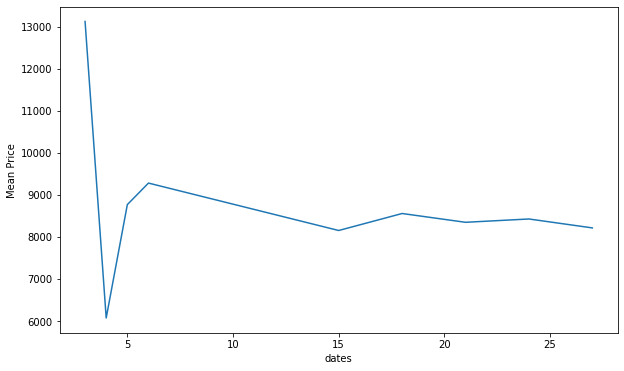

In [39]:
plt.figure(figsize=(10,6))
train.groupby(train['Date_of_Journey'].dt.day)['Price'].mean().plot()
plt.xlabel("dates")
plt.ylabel("Mean Price")
plt.show()

In [40]:
train['Total_Stops'].value_counts()

1 stop          3145
non-stop        1966
2 stops          839
3 or 4 stops      23
Name: Total_Stops, dtype: int64

In [41]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-09-04,Banglore,Delhi,4.000000,6.833333,2.833333,non-stop,No info,3943.0
1,IndiGo,2019-03-06,Banglore,Delhi,8.500000,11.333333,2.833333,non-stop,No info,4823.0
2,Jet Airways,2019-09-06,Mumbai,Hyderabad,19.583333,21.083333,1.500000,non-stop,In-flight meal not included,3210.0
3,Multiple carriers,2019-05-27,Delhi,Cochin,12.833333,21.000000,8.166667,1 stop,No info,7005.0
4,Air India,2019-06-06,Delhi,Cochin,6.833333,7.666667,24.833333,2 stops,No info,13381.0


In [42]:
mean_source = train.groupby(train['Source'])['Price'].mean().to_dict()
train.loc[:,'Source'] =  train.loc[:,'Source'].map(mean_source)
test.loc[:,'Source'] =  test.loc[:,'Source'].map(mean_source)
val.loc[:,'Source'] =  val.loc[:,'Source'].map(mean_source)

In [43]:
mean_destination = train.groupby(train['Destination'])['Price'].mean().to_dict()
train.loc[:,'Destination'] =  train.loc[:,'Destination'].map(mean_destination)
test.loc[:,'Destination'] =  test.loc[:,'Destination'].map(mean_destination)
val.loc[:,'Destination'] =  val.loc[:,'Destination'].map(mean_destination)

In [44]:
ts_dict = {'1 stop' : 0, 'non-stop':1, '2 stops':2, '3 or 4 stops':3}
train.loc[:,'Total_Stops'] =  train.loc[:,'Total_Stops'].map(ts_dict)
test.loc[:,'Total_Stops'] =  test.loc[:,'Total_Stops'].map(ts_dict)
val.loc[:,'Total_Stops'] =  val.loc[:,'Total_Stops'].map(ts_dict)

In [45]:
train["Additional_Info"].value_counts()

No info                         4695
In-flight meal not included     1088
No check-in baggage included     175
Other                             15
Name: Additional_Info, dtype: int64

In [46]:
ai_dict = {'No info' : 0, 'In-flight meal not included':1, 'No check-in baggage included':2, 'Other':3}
train.loc[:,'Additional_Info'] =  train.loc[:,'Additional_Info'].map(ai_dict)
test.loc[:,'Additional_Info'] =  test.loc[:,'Additional_Info'].map(ai_dict)
val.loc[:,'Additional_Info'] =  val.loc[:,'Additional_Info'].map(ai_dict)

In [47]:
mean_airline = train.groupby(train['Airline'])['Price'].mean().to_dict()
train.loc[:,'Airline'] =  train.loc[:,'Airline'].map(mean_airline)
test.loc[:,'Airline'] =  test.loc[:,'Airline'].map(mean_airline)
val.loc[:,'Airline'] =  val.loc[:,'Airline'].map(mean_airline)

In [48]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,5691.869304,2019-09-04,7869.987664,5153.533333,4.000000,6.833333,2.833333,1,0,3943.0
1,5691.869304,2019-03-06,7869.987664,5153.533333,8.500000,11.333333,2.833333,1,0,4823.0
2,11679.084738,2019-09-06,5055.932990,5055.932990,19.583333,21.083333,1.500000,1,1,3210.0
3,10735.014859,2019-05-27,10499.676161,10499.676161,12.833333,21.000000,8.166667,0,0,7005.0
4,9580.873469,2019-06-06,10499.676161,10499.676161,6.833333,7.666667,24.833333,2,0,13381.0


## Feature Engneering

In [49]:
train['month'] = train['Date_of_Journey'].dt.month
train['week'] = train['Date_of_Journey'].dt.week
train['quarter'] = train['Date_of_Journey'].dt.quarter
train['date of month'] = train['Date_of_Journey'].dt.day

test['Date_of_Journey']=pd.to_datetime(test['Date_of_Journey'])
test['month'] = test['Date_of_Journey'].dt.month
test['week'] = test['Date_of_Journey'].dt.week
test['quarter'] = test['Date_of_Journey'].dt.quarter
test['date of month'] = test['Date_of_Journey'].dt.day

val['Date_of_Journey']=pd.to_datetime(val['Date_of_Journey'])
val['month'] = val['Date_of_Journey'].dt.month
val['week'] = val['Date_of_Journey'].dt.week
val['quarter'] = val['Date_of_Journey'].dt.quarter
val['date of month'] = val['Date_of_Journey'].dt.day

In [50]:
def days(date):
    day, month, year = date.day , date.month , date.year   
    day_name = datetime.date(int(year), int(month), int(day)) 
    return (day_name.strftime("%A")) 

In [51]:
train['day'] = train['Date_of_Journey'].apply(days)
test['day'] = test['Date_of_Journey'].apply(days)
val['day'] = val['Date_of_Journey'].apply(days)

In [52]:
day_dict = {'Sunday' : 0, 'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6}
train.loc[:,'day'] =  train.loc[:,'day'].map(day_dict)
test.loc[:,'day'] =  test.loc[:,'day'].map(day_dict)
val.loc[:,'day'] =  val.loc[:,'day'].map(day_dict)

In [53]:
train.drop(labels=['Date_of_Journey'], axis=1, columns=None,inplace=True)
test.drop(labels=['Date_of_Journey'], axis=1, columns=None,inplace=True)
val.drop(labels=['Date_of_Journey'], axis=1, columns=None,inplace=True)

In [54]:
test.isnull().sum()

Airline            0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
month              0
week               0
quarter            0
date of month      0
day                0
dtype: int64

In [55]:
val.isnull().sum()

Airline            0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
month              0
week               0
quarter            0
date of month      0
day                0
dtype: int64

In [56]:
train.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,week,quarter,date of month,day
0,5691.869304,7869.987664,5153.533333,4.000000,6.833333,2.833333,1,0,3943.0,9,36,3,4,3
1,5691.869304,7869.987664,5153.533333,8.500000,11.333333,2.833333,1,0,4823.0,3,10,1,6,3
2,11679.084738,5055.932990,5055.932990,19.583333,21.083333,1.500000,1,1,3210.0,9,36,3,6,5
3,10735.014859,10499.676161,10499.676161,12.833333,21.000000,8.166667,0,0,7005.0,5,22,2,27,1
4,9580.873469,10499.676161,10499.676161,6.833333,7.666667,24.833333,2,0,13381.0,6,23,2,6,4


## Feature Selection

In [57]:
len(train.columns)

14

In [58]:
selector = SelectKBest(f_regression, k=13)    #13 is found after checking all, it is most appropriate number
selector.fit(train.drop(labels=['Price'], axis=1, columns=None),train.Price)
cols = selector.get_support(indices=True)
Features = train.drop(labels=['Price'], axis=1, columns=None).iloc[:,cols].columns.tolist()

In [59]:
Features

['Airline',
 'Source',
 'Destination',
 'Dep_Time',
 'Arrival_Time',
 'Duration',
 'Total_Stops',
 'Additional_Info',
 'month',
 'week',
 'quarter',
 'date of month',
 'day']

Didn't get much help from this feature selection,  will do in modeling itself

In [60]:
RMSE_Score = []
R2_Score = []
Algorithm = []

### Random Forest Regressor

In [61]:
Algorithm.append('Random Forest Regressor')
rfr = RandomForestRegressor()
rfr.fit(train[Features],train.Price)
predicted = rfr.predict(val[Features])
rmse = mean_squared_error(val.Price, predicted, squared=False)
print('RMSE :',rmse)
print('R2 Score : ',r2_score(val.Price, predicted))

RMSE : 1285.6239066347648
R2 Score :  0.9079985857328343


In [62]:
rfr = RandomForestRegressor()
rfr.fit(train.append(val)[Features],train.append(val)['Price'])
predicted = rfr.predict(test[Features])
rmse = mean_squared_error(test.Price, predicted, squared=False)
print('RMSE :',rmse)
print('R2 Score : ',r2_score(test.Price, predicted))

RMSE : 1281.6606925488495
R2 Score :  0.9110643542413247


In [63]:
#min_samples_split : The minimum number of samples required to split an internal node
iters = [2, 5, 8, 12,24]
for i in iters:
    rfr = RandomForestRegressor(max_features ="auto",max_depth=None,min_samples_split=i,random_state=42)
    rfr.fit(train[Features],train.Price)
    predicted = rfr.predict(val[Features])
    rmse = mean_squared_error(val.Price, predicted, squared=False)
    print(i,'\t',rmse)

2 	 1302.246492702012
5 	 1284.7587683103995
8 	 1283.0351851804955
12 	 1314.6075165540203
24 	 1399.1036734648862


In [64]:
#min_samples_leaf
iters = [1, 2, 6, 11, 15]
for i in iters:
    rfr = RandomForestRegressor(min_samples_split=8,min_samples_leaf=i,random_state=42)
    rfr.fit(train[Features],train.Price)
    predicted = rfr.predict(val[Features])
    rmse = mean_squared_error(val.Price, predicted, squared=False)
    print(i,'\t',rmse)

1 	 1283.0351851804955
2 	 1285.4779383706639
6 	 1376.110557919145
11 	 1520.927953429579
15 	 1589.864852880742


In [66]:
rfr = RandomForestRegressor(min_samples_split=8,min_samples_leaf=1)
rfr.fit(train[Features],train.Price)
predicted = rfr.predict(val[Features])
rmse = mean_squared_error(val.Price, predicted, squared=False)
print('RMSE :',rmse)
print('R2 Score : ',r2_score(val.Price, predicted))
print()

RMSE : 1272.908617357114
R2 Score :  0.9098094412939639



In [67]:
rfr = RandomForestRegressor(min_samples_split=8,min_samples_leaf=1)
rfr.fit(train.append(val)[Features],train.append(val)['Price'])
predicted = rfr.predict(test[Features])
rmse = mean_squared_error(test.Price, predicted, squared=False)
r = r2_score(test.Price, predicted)
print('RMSE :',rmse)
print('R2 Score : ',r)
RMSE_Score.append(rmse)
R2_Score.append(r)

RMSE : 1284.6036109692789
R2 Score :  0.9106554615583812


## XGB Regressor

In [68]:
Algorithm.append('XGB Regressor')
rfr = xgb.XGBRegressor()
rfr.fit(train[Features],train.Price)
predicted = rfr.predict(val[Features])
rmse = mean_squared_error(val.Price, predicted, squared=False)
print('RMSE :',rmse)
print('R2 Score : ',r2_score(val.Price, predicted))

RMSE : 1197.7400294274678
R2 Score :  0.920146905157362


In [69]:
rfr = xgb.XGBRegressor()
rfr.fit(train.append(val)[Features],train.append(val)['Price'])
predicted = rfr.predict(test[Features])
rmse = mean_squared_error(test.Price, predicted, squared=False)
print('RMSE :',rmse)
print('R2 Score : ',r2_score(test.Price, predicted))

RMSE : 1323.468652134847
R2 Score :  0.9051675325447713


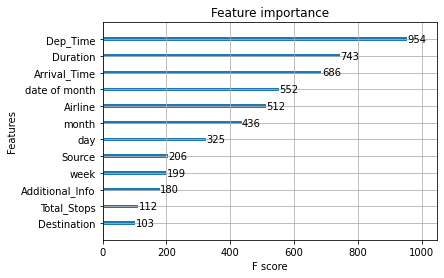

In [70]:
from xgboost import plot_importance
plot_importance(rfr)
plt.show()

[0.12134325 0.0316016  0.09169053 0.01383708 0.0187627  0.30464193
 0.08204439 0.15268531 0.0625805  0.00855794 0.         0.10080091
 0.01145385]


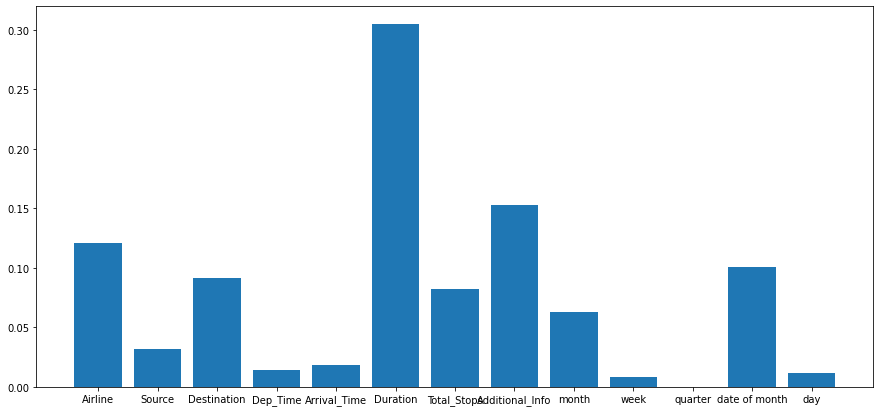

In [71]:
print(rfr.feature_importances_)
# plot
fig = plt.figure(figsize =(15, 7)) 
plt.bar(Features, rfr.feature_importances_)
plt.show()

In [72]:
from numpy import sort
from sklearn.feature_selection import SelectFromModel
thresholds = sort(rfr.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(rfr, threshold=thresh, prefit=True)
    select_X_train = selection.transform(train[Features])
    # train model
    selection_model = xgb.XGBRegressor()
    selection_model.fit(select_X_train, train.Price)
    # eval model
    select_X_test = selection.transform(val[Features])
    predictions = selection_model.predict(select_X_test)
    rmse = mean_squared_error(val.Price, predictions, squared=False)
    r = r2_score(val.Price, predictions)
    print("Thresh=%.3f, n=%d, RMSE: %.2f, R2_Score: %.2f" % (thresh, select_X_train.shape[1], rmse, r))

Thresh=0.000, n=13, RMSE: 1197.74, R2_Score: 0.92
Thresh=0.009, n=12, RMSE: 1197.74, R2_Score: 0.92
Thresh=0.011, n=11, RMSE: 1289.69, R2_Score: 0.91
Thresh=0.014, n=10, RMSE: 1274.33, R2_Score: 0.91
Thresh=0.019, n=9, RMSE: 1235.52, R2_Score: 0.92
Thresh=0.032, n=8, RMSE: 1331.24, R2_Score: 0.90
Thresh=0.063, n=7, RMSE: 1355.07, R2_Score: 0.90
Thresh=0.082, n=6, RMSE: 1845.51, R2_Score: 0.81
Thresh=0.092, n=5, RMSE: 1914.02, R2_Score: 0.80
Thresh=0.101, n=4, RMSE: 1950.45, R2_Score: 0.79
Thresh=0.121, n=3, RMSE: 2323.39, R2_Score: 0.70
Thresh=0.153, n=2, RMSE: 2931.70, R2_Score: 0.52
Thresh=0.305, n=1, RMSE: 2996.26, R2_Score: 0.50


So all features are needed except quarter

In [73]:
Features = train.drop(labels=['Price','quarter'], axis=1, columns=None).columns.tolist()

In [74]:
iters = [0.2,0.3,0.4,0.5,0.6,0.8,0.9]
for i in iters:
    rfr = xgb.XGBRegressor(eta = i,random_state=42)
    rfr.fit(train[Features],train.Price)
    predicted = rfr.predict(val[Features])
    rmse = mean_squared_error(val.Price, predicted, squared=False)
    print(i,'\t',rmse)

0.2 	 1244.3454998088564
0.3 	 1197.7400294274678
0.4 	 1353.1373424649532
0.5 	 1283.0022512558405
0.6 	 1331.3746145206812
0.8 	 1323.31209572527
0.9 	 1371.008333971494


In [75]:
#min_samples_split : The minimum number of samples required to split an internal node
iters = [3, 6, 8, 10]
for i in iters:
    rfr = xgb.XGBRegressor(eta = 0.3,max_depth = i,random_state=42)
    rfr.fit(train[Features],train.Price)
    predicted = rfr.predict(val[Features])
    rmse = mean_squared_error(val.Price, predicted, squared=False)
    print(i,'\t',rmse)

3 	 1489.1242947062963
6 	 1197.7400294274678
8 	 1343.1820972210883
10 	 1378.5648131604028


6 is default

In [76]:
#min_samples_split : The minimum number of samples required to split an internal node
iters = [1, 3, 5, 7]
for i in iters:
    rfr = xgb.XGBRegressor(eta = 0.3,min_child_weight = i,random_state=42)
    rfr.fit(train[Features],train.Price)
    predicted = rfr.predict(val[Features])
    rmse = mean_squared_error(val.Price, predicted, squared=False)
    print(i,'\t',rmse)

1 	 1197.7400294274678
3 	 1248.17567778653
5 	 1254.8628824408286
7 	 1276.0944912646673


1 is default

In [77]:
rfr = xgb.XGBRegressor(eta=0.3)
rfr.fit(train.append(val)[Features],train.append(val)['Price'])
predicted = rfr.predict(test[Features])
rmse = mean_squared_error(test.Price, predicted, squared=False)
r = r2_score(test.Price, predicted)
print('RMSE :',rmse)
print('R2 Score : ',r)
RMSE_Score.append(rmse)
R2_Score.append(r)

RMSE : 1323.468652134847
R2 Score :  0.9051675325447713


In [78]:
Comparison = pd.DataFrame(list(zip(Algorithm, RMSE_Score, R2_Score)), columns = ['Algorithm', 'RMSE_Score', 'R2_Score'])
Comparison

,Algorithm,RMSE_Score,R2_Score
0,Random Forest Regressor,1284.603611,0.910655
1,XGB Regressor,1323.468652,0.905168


# Random Forest Regressor WINS!!

In [79]:
df_test

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,SpiceJet,12-05-2019,Kolkata,Banglore,15:05,20:20,5h 15m,1 stop,No info
1,Air India,15-03-2019,Delhi,Cochin,18:05,21:10,3h 5m,non-stop,No info
2,Jet Airways,24-06-2019,Delhi,Cochin,11:45,25-06-2021 04:25,16h 40m,2 stops,No info
3,SpiceJet,21-06-2019,Kolkata,Banglore,09:00,11:25,2h 25m,non-stop,No info
4,IndiGo,27-04-2019,Kolkata,Banglore,14:25,16:55,2h 30m,non-stop,No info
...,...,...,...,...,...,...,...,...,...
2129,Air India,06-04-2019,Banglore,Delhi,17:00,19:45,2h 45m,non-stop,No info
2130,Jet Airways,01-04-2019,Kolkata,Banglore,06:30,20:45,14h 15m,1 stop,No info
2131,Multiple carriers,15-05-2019,Delhi,Cochin,08:45,19:00,10h 15m,1 stop,No info
2132,Air India,03-03-2019,Delhi,Cochin,21:30,04-03-2021 19:15,21h 45m,2 stops,No info


In [80]:
df_test.loc[:,'Airline'] =  df_test.loc[:,'Airline'].map(mean_airline)

In [81]:
df_test['Date_of_Journey']=pd.to_datetime(df_test['Date_of_Journey'])
df_test['month'] = df_test['Date_of_Journey'].dt.month
df_test['week'] = df_test['Date_of_Journey'].dt.week
df_test['quarter'] = df_test['Date_of_Journey'].dt.quarter
df_test['date of month'] = df_test['Date_of_Journey'].dt.day
df_test['day'] = df_test['Date_of_Journey'].apply(days)
df_test.loc[:,'day'] =  df_test.loc[:,'day'].map(day_dict)

In [82]:
df_test.Source.value_counts()

Delhi       912
Kolkata     580
Banglore    439
Mumbai      131
Chennai      72
Name: Source, dtype: int64

In [83]:
df_test.Destination.value_counts()

Cochin       912
Banglore     580
Delhi        247
New Delhi    192
Hyderabad    131
Kolkata       72
Name: Destination, dtype: int64

In [84]:
df_test.loc[:,'Source'] =  df_test.loc[:,'Source'].map(mean_source)
df_test.loc[:,'Destination'] =  df_test.loc[:,'Destination'].map(mean_destination)

In [85]:
df_test['Dep_Time']=pd.to_datetime(df_test['Dep_Time'],format='%H:%M').dt.time
df_test['Dep_Time']=df_test['Dep_Time'].apply(check)

In [86]:
df_test['Arrival_Time']=pd.to_datetime(df_test['Arrival_Time']).dt.time
df_test['Arrival_Time']=df_test['Arrival_Time'].apply(check)

In [87]:
df_test['Duration']=  df_test['Duration'].str.replace("h", '*1').str.replace(' ','+').str.replace('m','/60').apply(eval)

In [88]:
df_test.loc[:,'Total_Stops'] =  df_test.loc[:,'Total_Stops'].map(ts_dict)

In [89]:
df_test['Additional_Info'].value_counts()

No info                         1648
In-flight meal not included      407
No check-in baggage included      71
1 Long layover                     4
Change airports                    2
No Info                            1
Business class                     1
Name: Additional_Info, dtype: int64

In [90]:
df_test['Additional_Info'] = np.where(df_test['Additional_Info']=='No Info','No info',df_test['Additional_Info'])
df_test["Additional_Info"].replace({'Change airports':'Other', 
                               'Business class':'Other',                         
                               '1 Long layover':'Other', 
                              },inplace=True)

In [91]:
df_test.loc[:,'Additional_Info'] =  df_test.loc[:,'Additional_Info'].map(ai_dict)

In [92]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,month,week,quarter,date of month,day
0,4239.811659,2019-12-05,9122.237224,9122.237224,15.083333,20.333333,5.250000,0,0,12,49,4,5,4
1,9580.873469,2019-03-15,10499.676161,10499.676161,18.083333,21.166667,3.083333,1,0,3,11,1,15,5
2,11679.084738,2019-06-24,10499.676161,10499.676161,11.750000,4.416667,16.666667,2,0,6,26,2,24,1
3,4239.811659,2019-06-21,9122.237224,9122.237224,9.000000,11.416667,2.416667,1,0,6,25,2,21,5
4,5691.869304,2019-04-27,9122.237224,9122.237224,14.416667,16.916667,2.500000,1,0,4,17,2,27,6


In [93]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
month              0
week               0
quarter            0
date of month      0
day                0
dtype: int64

In [94]:
rfr = RandomForestRegressor(min_samples_split=8,min_samples_leaf=1)
rfr.fit(train.append(val.append(test))[Features],train.append(val.append(test))['Price'])
predicted = rfr.predict(df_test[Features])

In [96]:
df_test['Price'] = predicted 

In [97]:
len(df_test['Price'])

2134

In [103]:
df_test['Price'].to_csv('Final_prediction.csv' ,index=True) 